In [2]:
#pip install seaborn

In [3]:
#pip install tensorflow

In [4]:
#pip install sklearn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.manifold import TSNE

In [2]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.neighbors import NearestCentroid
from sklearn import neighbors, datasets
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [3]:
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [4]:
dataMNIST= loadmat('/Users/User/Desktop/UNI/Optmizzation/Assignment/MNIST/MNIST_all.mat')

In [5]:
train_images = dataMNIST['train_images']
y_train = dataMNIST['train_labels'].flatten()
test_images = dataMNIST['test_images']
y_test = dataMNIST['test_labels'].flatten()

In [6]:
x_train = train_images.T.reshape(60000,28*28)
x_test = test_images.T.reshape(10000,28*28)

In [7]:
X = np.concatenate((x_train, x_test))
Y = np.concatenate((y_train, y_test))

In [8]:
#Standardizing the feature
X_train = StandardScaler().fit_transform(x_train)
X_test = StandardScaler().fit_transform(x_test)

In [9]:
pca = PCA(n_components=2)
XPCA_train = pca.fit_transform(X_train)

In [10]:
pca = PCA(n_components=2)
XPCA_test = pca.fit_transform(X_test)

In [11]:
print('original data shape x_train',X_train.shape)
print('reduced data shape',XPCA_train.shape)
print('original data shape x_test',X_test.shape)
print('reduced data shape',XPCA_test.shape)

original data shape x_train (60000, 784)
reduced data shape (60000, 2)
original data shape x_test (10000, 784)
reduced data shape (10000, 2)


In [12]:
def PrintLearningCurve(estimator, title, X, y): 
    plt.figure() 
    plt.title(title)
    
    plt.xlabel("Training examples") 
    plt.ylabel("Score") 
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y) 
    train_scores_mean = np.mean(train_scores, axis=1) 
    train_scores_std = np.std(train_scores, axis=1) 
    test_scores_mean = np.mean(test_scores, axis=1) 
    test_scores_std = np.std(test_scores, axis=1) 
    plt.grid() 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r") 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="b") 
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score") 
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-Validation score") 
    plt.legend(loc="best") 
    
    return plt

In [13]:
def PrintDatasetPCA(x_train, y_train):
    
    x_DF = pd.DataFrame(data = x_train, columns= ['Feature 1','Feature 2'])
    y_DF = pd.DataFrame(y_train, columns = ['Images'])    
    x = pd.concat([x_DF, y_DF], axis = 1)
    sn.FacetGrid(x, hue= "Images", height = 10).map(sns.scatterplot, 'Feature 1', 'Feature 2').add_legend()
    plt.title('PCA Vision')
    plt.axis('tight')
    plt.show()

In [14]:
def PrintDatasetTSNE(x_train, y_train):
    
    model = TSNE(n_components= 2, learning_rate='auto', init='random', perplexity= 50)
    TSNEdata = model.fit_transform(x_train)
    
    x_DF = pd.DataFrame(data = TSNEdata, columns= ['Feature 1','Feature 2'])
    y_DF = pd.DataFrame(y_train, columns = ['Images'])    
    x = pd.concat([x_DF, y_DF], axis = 1)
    sn.FacetGrid(x, hue="Images", height = 10).map(sns.scatterplot, 'Feature 1', 'Feature 2').add_legend()
    plt.title('t-SNE Vision')
    plt.axis('tight')
    plt.show()

In [15]:
def NearCentr (x_train, y_train, x_test, y_test, metr):
    
    NC=NearestCentroid(metric= metr)
    hyper= NC.fit(x_train,y_train)
    print (hyper)
    y_pred=NC.predict(x_test)
    acc_NC=metrics.accuracy_score(y_test,y_pred)
    report_NC= metrics.classification_report(y_test, y_pred, zero_division= 1)
    
    return NC, acc_NC, report_NC, hyper, y_pred

In [16]:
def NearCentr235 (x_train, y_train, x_test, y_test, metr):
    
    #prepare data for selecting 2,3,5 type in y_train
    XPCA_trainPD= pd.DataFrame(data = x_train)
    XPCA_testPD= pd.DataFrame(data = x_test)
    y_trainPD= pd.DataFrame(y_train, columns = ['Label'])
    XY= pd.concat([XPCA_trainPD, y_trainPD], axis = 1)
    XPCA_train235= XY.loc[(XY['Label'] == 2) | (XY['Label']== 3) | (XY['Label']== 5)]
    YPCA_train235= XPCA_train235 ['Label']
    del XPCA_train235 ['Label']
    
    #prepare data for selecting 2,3,5 type in y_test
    y_testPD= pd.DataFrame(y_test, columns = ['Label'])
    XY= pd.concat([XPCA_testPD, y_testPD], axis = 1)
    XPCA_test235= XY.loc[(XY['Label'] == 2) | (XY['Label']== 3) | (XY['Label']== 5)]
    YPCA_test235= XPCA_test235 ['Label']
    del XPCA_test235 ['Label']
    
    #Nearest Centroid for 2,3,5 class
    NC= NearestCentroid(metric= metr)
    hyper= NC.fit(XPCA_train235,YPCA_train235)
    y_pred= NC.predict(XPCA_test235)
    acc_NC= metrics.accuracy_score(YPCA_test235,y_pred)
    report_NC= metrics.classification_report(YPCA_test235, y_pred, zero_division= 1)
    
    return NC, acc_NC, report_NC, hyper, XPCA_train235.to_numpy(), YPCA_train235.to_numpy(), XPCA_test235.to_numpy(), y_pred

In [17]:
def KNeighbors (x_train, y_train, x_test, y_test, weight, n_neigh, algo, metr, leafs):
    
    KNN= KNeighborsClassifier(n_neighbors= n_neigh, weights= weight, metric= metr, leaf_size= leafs)   
    hyper= KNN.fit(x_train,y_train)
    print (hyper)
    y_pred= KNN.predict(x_test)
    acc_KNN= metrics.accuracy_score(y_test,y_pred)
    report_KNN= metrics.classification_report(y_test, y_pred)
    
    return KNN, acc_KNN, report_KNN, hyper, y_pred

In [18]:
def PerceptronBackprop (x_train, y_train, x_test, y_test, iteration, al, eta, shuff, intercept):
    
    SGD = SGDClassifier(loss="hinge",learning_rate="optimal", max_iter= iteration, alpha= al, eta0= eta, shuffle= shuff, fit_intercept= intercept)
    hyper= SGD.fit(x_train, y_train)
    SGD.score(x_train, y_train)
    y_pred = SGD.predict(x_test)
    acc_SGD = metrics.accuracy_score(y_test,y_pred)
    report_SGD= metrics.classification_report(y_test, y_pred, zero_division= 1)
   
    return SGD, acc_SGD, report_SGD, hyper, y_pred

In [19]:
def PerceptronMSE (x_train, y_train, x_test, y_test, iteration, al, eta, shuff, intercept):
                                                        
    SGD = SGDClassifier(loss="squared_error",learning_rate="optimal", max_iter= iteration, alpha= al, eta0= eta, shuffle= shuff, fit_intercept= intercept)
    hyper= SGD.fit(x_train, y_train)
    SGD.score(x_train, y_train)
    y_pred = SGD.predict(x_test)
    acc_SGD = metrics.accuracy_score(y_test,y_pred)
    report_SGD= metrics.classification_report(y_test, y_pred, zero_division= 1)
   
    return SGD, acc_SGD, report_SGD, hyper, y_pred

In [20]:
def NCpcaPlot (acc_NC, report_NC, NC, x_train, y_train, x_test, y_pred, hyper):
    
    print()
    print("The setting of the model is", hyper, ", where blank value occur the parameter are setted to default");    
    print("Testing accuracy of NC is ",acc_NC)
    print("Performance Measure of NC model:\n\n",report_NC)
    
    # Plot the decision boundary
    h = 0.02
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = NC.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.title("Class classification Boundary decision")
    plt.pcolormesh(xx, yy, Z, shading='auto')
    plt.show()

    # Plot the result with scatterplot
    plt.figure()
    plt.scatter(x_test[:, 0], x_test[:, 1], c= y_pred, edgecolor="k", s=30)
    plt.title("Class classification Scatterplot")
    plt.axis("tight")
    plt.show()
    
    #Plot learning curve
    PrintLearningCurve(NC, "Learning Curves", x_train, y_train) 
    plt.show()

In [21]:
def NCPlot (acc_NC, report_NC, NC, x_train, y_train, x_test, y_pred, hyper):
    
    print()
    print("The setting of the model for a better accuracy is", hyper, ", where blank value occur the parameter are setted to default");
    print("Testing accuracy of NC model is ",acc_NC)
    print("Performance Measure of NC model:\n\n",report_NC)
    
    model = TSNE(n_components= 2, learning_rate='auto', init='random', perplexity= 2)
    x = model.fit_transform(x_train)  
       
    # Plot the decision boundary
    h = 0.02
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    NC.fit(x,y_train)
    Z = NC.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.title("Class classification Boundary decision")
    plt.pcolormesh(xx, yy, Z, shading='auto')
    plt.show()
    
    model = TSNE(n_components= 2, learning_rate='auto', init='random', perplexity= 2)
    x = model.fit_transform(x_test)

    # Plot the result with scatterplot
    plt.figure()
    plt.scatter(x[:, 0], x[:, 1], c= y_pred, edgecolor="k", s=30)
    plt.title("Class classification Scatterplot")
    plt.axis("tight")
    plt.show()
     
    #Plot learning curve
    PrintLearningCurve(NC, "Learning Curves", x_train, y_train) 
    plt.show()

In [22]:
def KNNpcaPlot (acc_KNN, report_KNN, KNN, x_train, y_train, x_test, y_pred, hyper):

    print()
    print("The setting of the model for a better accuracy is", hyper, ", where blank value occur the parameter are setted to default");    
    print("Testing accuracy of KNN model is ",acc_KNN)
    print("Performance Measure of KNN model:\n\n",report_KNN)
    
    h = 0.02
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.title("Class classification Boundary decision")
    plt.pcolormesh(xx, yy, Z, shading='auto')
    plt.show()
    
    # Plot the result with scatterplot
    plt.figure()
    plt.scatter(x_test[:, 0], x_test[:, 1], c= y_pred, edgecolor="k", s=30)
    plt.title("Class classification Scatterplot")
    plt.axis("tight")
    plt.show()

    #Plot learning curve
    PrintLearningCurve(KNN, "Learning Curves", x_train, y_train) 
    plt.show()

In [23]:
def KNNPlot (acc_KNN, report_KNN, KNN, x_train, y_train, x_test, y_pred, hyper):

    print()
    print("The setting of the model for a better accuracy is", hyper, ", where blank value occur the parameter are setted to default");    
    print("Testing accuracy of KNN model is ",acc_KNN)
    print("Performance Measure of KNN model:\n\n",report_KNN)
    
    model = TSNE(n_components= 2, learning_rate='auto', init='random', perplexity= 2)
    x = model.fit_transform(x_train)
    
    # Plot the decision boundary
    h = 0.02
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    KNN.fit(x,y_train)
    Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.title("Class classification Boundary decision")
    plt.pcolormesh(xx, yy, Z, shading='auto')
    plt.show()
    
    model = TSNE(n_components= 2, learning_rate='auto', init='random', perplexity= 2)
    x = model.fit_transform(x_test)
    
    # Plot the result with scatterplot
    plt.figure()
    plt.scatter(x[:, 0], x[:, 1], c= y_pred, edgecolor="k", s=30)
    plt.title("Class classification Scatterplot")
    plt.axis("tight")
    plt.show()    
    
    #Plot learning curve, not included due too much heavy computation
    PrintLearningCurve(KNN, "Learning Curves", x_train, y_train) 
    plt.show()

In [24]:
def PerceptronPCAplot (acc_SGD, report_SGD, SGD, x_train, y_train, x_test, y_pred, hyper):

    print()
    print("The setting of the model for a better accuracy is", hyper, ", where blank value occur the parameter are setted to default")
    print("Testing accuracy of Perceptron model is ",acc_SGD)
    print("Performance Measure of Perceptron model:\n\n",report_SGD)
      
    plt.figure()    
    xx = np.linspace(-20, 40, 10)
    yy = np.linspace(-25, 35, 10)
    X1, X2 = np.meshgrid(xx, yy)
    Z = np.empty(X1.shape)
    for (i, j), val in np.ndenumerate(X1):
        x1 = val
        x2 = X2[i, j]
        p = SGD.decision_function([[x1, x2]]).flatten()
        Z[i, j] = p[0]
    levels = [-1, 0.0, 1]
    linestyles = ["dashed", "solid", "dashed"]
    colors = "k"
    plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor="black", s=20)

    plt.title("Linear decision function on training")
    plt.axis("tight")
    plt.show()
    
    # Plot the result with scatterplot
    plt.figure()
    plt.scatter(x_test[:, 0], x_test[:, 1], c= y_pred, edgecolor="k", s=30)
    plt.title("Class classification Scatterplot")
    plt.axis("tight")
    plt.show()    

    #Plot learning curve
    PrintLearningCurve(SGD, "Learning Curves", x_train, y_train) 
    plt.show()

In [25]:
def PerceptronPlot (acc_SGD, report_SGD, SGD, x_train, y_train, x_test, y_pred, hyper):
    
    print()
    print("The setting of the model for a better accuracy is", hyper, ", where blank value occur the parameter are setted to default")
    print("Testing accuracy of Perceptron model is ",acc_SGD)
    print("Performance Measure of Perceptron model:\n\n",report_SGD)
    
    model = TSNE(n_components= 2, learning_rate='auto', init='random', perplexity= 2)
    x = model.fit_transform(x_train)
    
    plt.figure()
    xx = np.linspace(-20, 40, 10)
    yy = np.linspace(-25, 35, 10)
    X1, X2 = np.meshgrid(xx, yy)
    Z = np.empty(X1.shape)
    for (i, j), val in np.ndenumerate(X1):
        x1 = val
        x2 = X2[i, j]
        SGD.fit(x,y_train)
        p = SGD.decision_function([[x1, x2]]).flatten()
        Z[i, j] = p[0]
    levels = [-1, 0.0, 1]
    linestyles = ["dashed", "solid", "dashed"]
    colors = "k"
    plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
    plt.scatter(x[:, 0], x[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor="black", s=20)
    
    plt.title("Class classification on training")
    plt.axis("tight")
    plt.show()
    
    model = TSNE(n_components= 2, learning_rate='auto', init='random', perplexity= 2)
    x = model.fit_transform(x_test)
    
    # Plot the result with scatterplot
    plt.figure()
    plt.scatter(x[:, 0], x[:, 1], c= y_pred, edgecolor="k", s=30)
    plt.title("Class classification Scatterplot")
    plt.axis("tight")
    plt.show() 

    #Plot learning curve
    PrintLearningCurve(SGD, "Learning Curves", x_train, y_train) 
    plt.show()

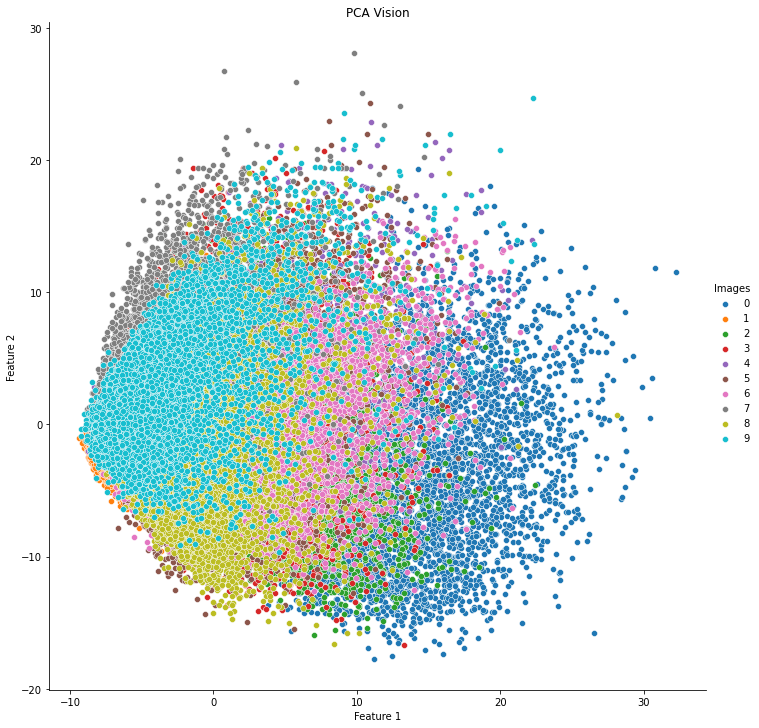

In [29]:
PrintDatasetPCA(XPCA_train,y_train)

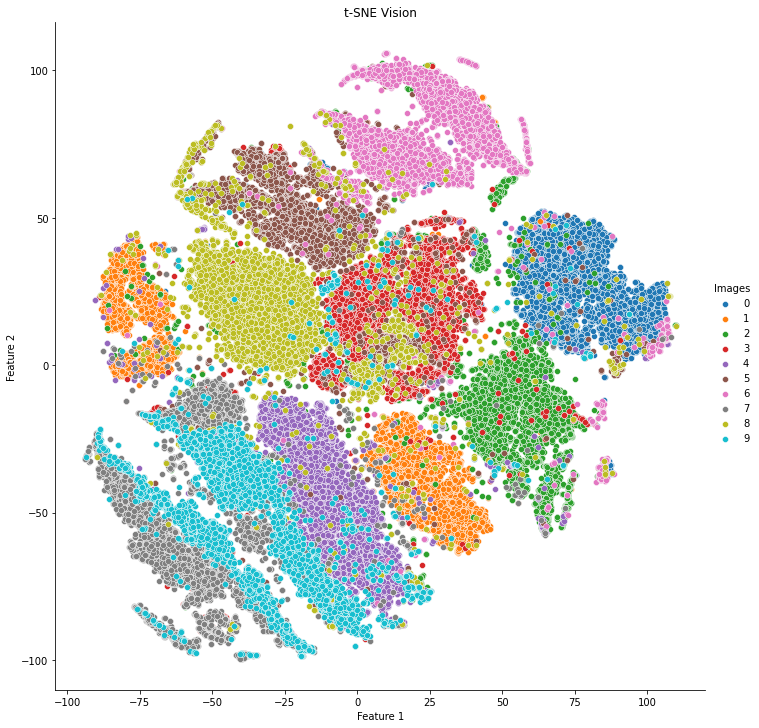

In [30]:
PrintDatasetTSNE(X_train,y_train)

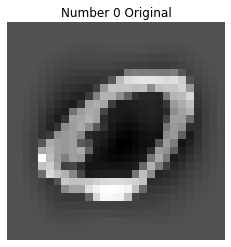

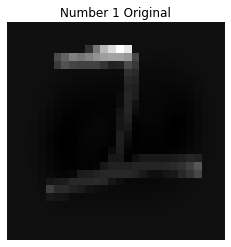

In [31]:
# Visualising /Plotting a number.
plt.figure(figsize=(4,4))
idx = 1
plt.title("Number 0 Original")
plt.axis('off')

grid_data = X_train[idx].reshape(28,28)  # Transforming from 1D to 2D pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray") #Plotting grey scale image
plt.show()

plt.figure(figsize=(4,4))
plt.title("Number 1 Original")
plt.axis('off')

grid_data = X_train[2].reshape(28,28)  # Transforming from 1D to 2D pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray") #Plotting grey scale image
plt.show()


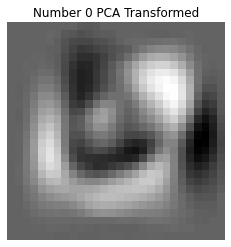

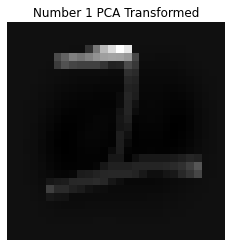

In [32]:
# Visualising /Plotting a number.
plt.figure(figsize=(4,4))
idx = 1
plt.title("Number 0 PCA Transformed")
plt.axis('off')
im_recovered = pca.inverse_transform(XPCA_train)

grid_data = im_recovered[idx].reshape(28,28)  # Transforming from 1D to 2D pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray") #Plotting grey scale image
plt.show()

plt.figure(figsize=(4,4))
plt.title("Number 1 PCA Transformed")
plt.axis('off')
grid_data = X_train[2].reshape(28,28)  # Transforming from 1D to 2D pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray") #Plotting grey scale image
plt.show()

NearestCentroid()
NearestCentroid(metric='manhattan')

The setting of the model is NearestCentroid() , where blank value occur the parameter are setted to default
Testing accuracy of NC is  0.3486
Performance Measure of NC model:

               precision    recall  f1-score   support

           0       0.52      0.72      0.60       980
           1       0.58      0.96      0.72      1135
           2       0.15      0.11      0.13      1032
           3       0.13      0.03      0.05      1010
           4       0.35      0.22      0.27       982
           5       0.18      0.16      0.17       892
           6       0.15      0.11      0.13       958
           7       0.38      0.71      0.49      1028
           8       0.23      0.31      0.27       974
           9       0.13      0.05      0.08      1009

    accuracy                           0.35     10000
   macro avg       0.28      0.34      0.29     10000
weighted avg       0.28      0.35      0.30     10000



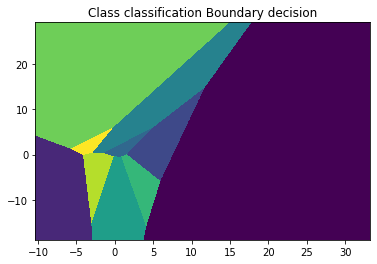

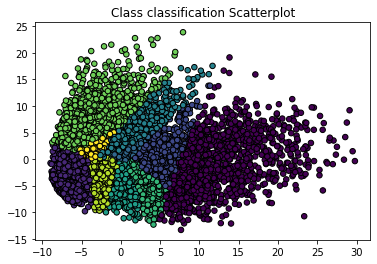

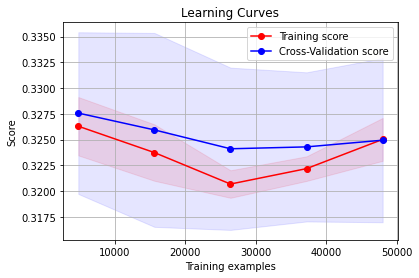

In [33]:
NC_eval, acc_eval, report_eval, hyper, y_pred= NearCentr (XPCA_train, y_train, XPCA_test, y_test, 'euclidean')

NC_eval_temp, acc_eval_temp, report_eval_temp, hyper_temp, y_pred_temp= NearCentr (XPCA_train, y_train, XPCA_test, y_test, 'manhattan')

if (acc_eval< acc_eval_temp):
    hyper= hyper_temp
    NC_eval= NC_eval_temp
    acc_eval= acc_eval_temp
    report_eval= report_eval_temp
    y_pred= y_pred_temp

NCpcaPlot (acc_eval, report_eval, NC_eval, XPCA_train, y_train, XPCA_test, y_pred, hyper)

NearestCentroid()
NearestCentroid(metric='manhattan')

The setting of the model for a better accuracy is NearestCentroid() , where blank value occur the parameter are setted to default
Testing accuracy of NC model is  0.8089
Performance Measure of NC model:

               precision    recall  f1-score   support

           0       0.86      0.81      0.84       980
           1       0.76      0.97      0.85      1135
           2       0.91      0.75      0.82      1032
           3       0.76      0.82      0.79      1010
           4       0.83      0.82      0.82       982
           5       0.75      0.70      0.73       892
           6       0.89      0.84      0.87       958
           7       0.89      0.80      0.85      1028
           8       0.75      0.73      0.74       974
           9       0.74      0.80      0.77      1009

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81   

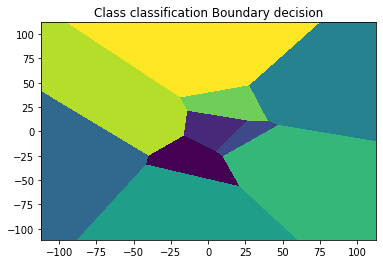

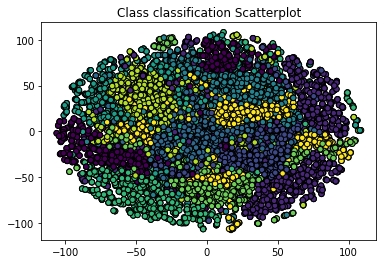

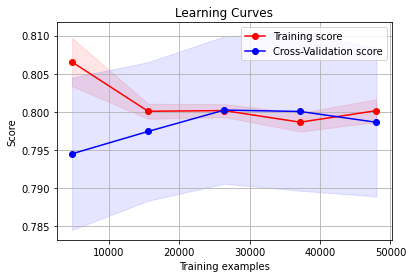

In [34]:
NC_eval, acc_eval, report_eval, hyper, y_pred= NearCentr (X_train, y_train, X_test, y_test, 'euclidean')

NC_eval_temp, acc_eval_temp, report_eval_temp, hyper_temp, y_pred_temp= NearCentr (X_train, y_train, X_test, y_test, 'manhattan')

if (acc_eval< acc_eval_temp):
    hyper= hyper_temp
    NC_eval= NC_eval_temp
    acc_eval= acc_eval_temp
    report_eval= report_eval_temp
    y_pred= y_pred_temp

NCPlot (acc_eval, report_eval, NC_eval, X_train, y_train, X_test, y_pred, hyper)


The setting of the model is NearestCentroid(metric='manhattan') , where blank value occur the parameter are setted to default
Testing accuracy of NC is  0.4069529652351738
Performance Measure of NC model:

               precision    recall  f1-score   support

           2       0.51      0.55      0.53      1032
           3       0.39      0.21      0.27      1010
           5       0.32      0.46      0.38       892

    accuracy                           0.41      2934
   macro avg       0.41      0.41      0.39      2934
weighted avg       0.41      0.41      0.40      2934



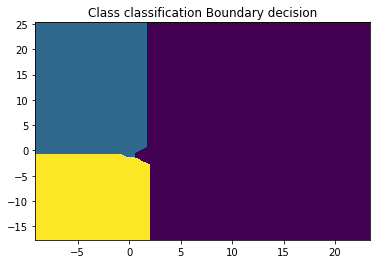

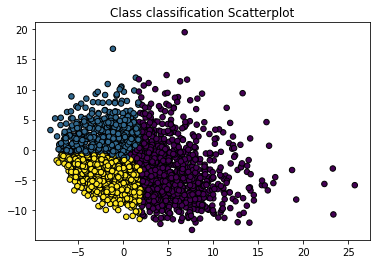

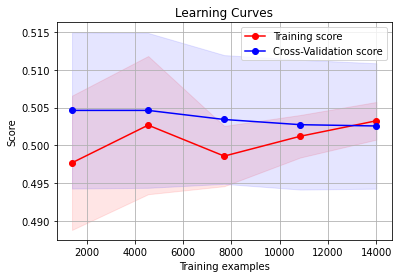

In [35]:
NC_eval, acc_eval, report_eval, hyper, x_tr, y_tr, x_te, y_pred= NearCentr235 (XPCA_train, y_train, XPCA_test, y_test, 'euclidean')

NC_eval_temp, acc_eval_temp, report_eval_temp, hyper_temp, x_tr, y_tr, x_te, y_pred_temp= NearCentr235 (XPCA_train, y_train, XPCA_test, y_test, 'manhattan')

if (acc_eval< acc_eval_temp):
    hyper= hyper_temp
    NC_eval= NC_eval_temp
    acc_eval= acc_eval_temp
    report_eval= report_eval_temp
    y_pred= y_pred_temp

NCpcaPlot (acc_eval, report_eval, NC_eval, x_tr, y_tr, x_te, y_pred, hyper)


The setting of the model for a better accuracy is NearestCentroid() , where blank value occur the parameter are setted to default
Testing accuracy of NC model is  0.8773006134969326
Performance Measure of NC model:

               precision    recall  f1-score   support

           2       0.95      0.88      0.91      1032
           3       0.82      0.91      0.86      1010
           5       0.88      0.84      0.86       892

    accuracy                           0.88      2934
   macro avg       0.88      0.88      0.88      2934
weighted avg       0.88      0.88      0.88      2934



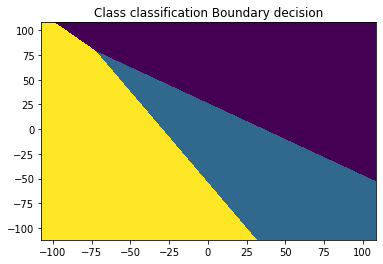

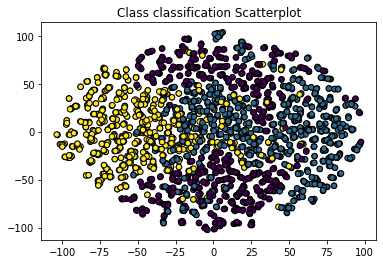

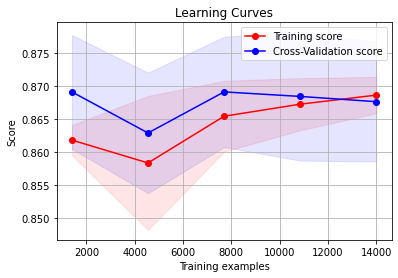

In [36]:
NC_eval, acc_eval, report_eval, hyper, x_tr, y_tr, x_te, y_pred= NearCentr235 (X_train, y_train, X_test, y_test, 'euclidean')

NC_eval_temp, acc_eval_temp, report_eval_temp, hyper_temp, x_tr, y_tr, x_te, y_pred_temp= NearCentr235 (X_train, y_train, X_test, y_test, 'manhattan')

if (acc_eval< acc_eval_temp):
    hyper= hyper_temp
    NC_eval= NC_eval_temp
    acc_eval= acc_eval_temp
    report_eval= report_eval_temp
    y_pred= y_pred_temp

NCPlot (acc_eval, report_eval, NC_eval, x_tr, y_tr, x_te, y_pred, hyper)

KNeighborsClassifier(leaf_size=20, n_neighbors=20)
KNeighborsClassifier(n_neighbors=60)

The setting of the model for a better accuracy is KNeighborsClassifier(n_neighbors=60) , where blank value occur the parameter are setted to default
Testing accuracy of KNN model is  0.3606
Performance Measure of KNN model:

               precision    recall  f1-score   support

           0       0.54      0.68      0.60       980
           1       0.82      0.89      0.85      1135
           2       0.22      0.33      0.26      1032
           3       0.14      0.09      0.11      1010
           4       0.24      0.15      0.18       982
           5       0.18      0.16      0.17       892
           6       0.19      0.25      0.21       958
           7       0.45      0.61      0.52      1028
           8       0.19      0.08      0.12       974
           9       0.33      0.27      0.29      1009

    accuracy                           0.36     10000
   macro avg       0.33      0.35  

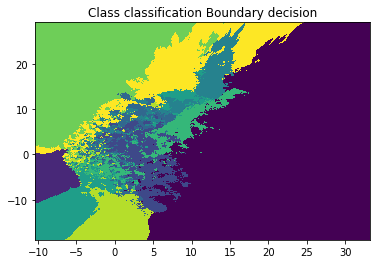

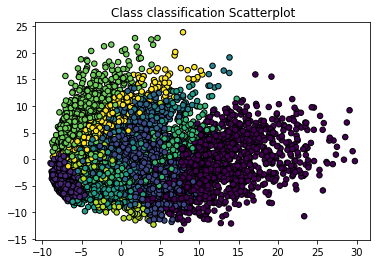

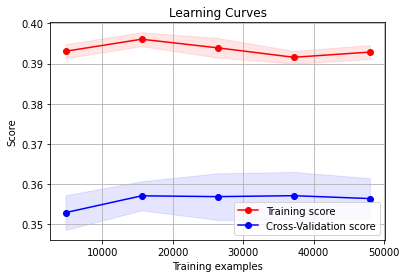

In [26]:
weight= 'uniform'
n_neigh= 20
algo= 'ball_tree'
metric= 'minkowski'
leafs= 20

KNN_eval, acc_eval, report_eval, hyper, y_pred= KNeighbors (XPCA_train, y_train, XPCA_test, y_test, weight, n_neigh, algo, metric, leafs)

weight= 'uniform'
n_neigh= 60
algo= 'ball_tree'
metric= 'minkowski'
leafs= 30

KNN_eval_temp, acc_eval_temp, report_eval_temp, hyper_temp, y_pred_temp= KNeighbors (XPCA_train, y_train, XPCA_test, y_test, weight, n_neigh, algo, metric, leafs)

if (acc_eval< acc_eval_temp):
    hyper= hyper_temp
    KNN_eval= KNN_eval_temp
    acc_eval= acc_eval_temp
    report_eval= report_eval_temp
    y_pred= y_pred_temp
    

KNNpcaPlot (acc_eval, report_eval, KNN_eval, XPCA_train, y_train, XPCA_test, y_pred, hyper)

KNeighborsClassifier(leaf_size=60, n_neighbors=9)
KNeighborsClassifier(metric='manhattan', n_neighbors=60, weights='distance')

The setting of the model for a better accuracy is KNeighborsClassifier(leaf_size=60, n_neighbors=9) , where blank value occur the parameter are setted to default
Testing accuracy of KNN model is  0.9415
Performance Measure of KNN model:

               precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.95      0.99      0.97      1135
           2       0.96      0.92      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.95      0.93      0.94       982
           5       0.93      0.93      0.93       892
           6       0.96      0.97      0.96       958
           7       0.94      0.92      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.91      0.92      0.91      1009

    accuracy                         

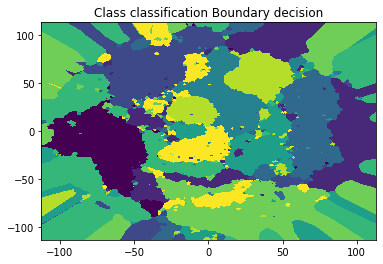

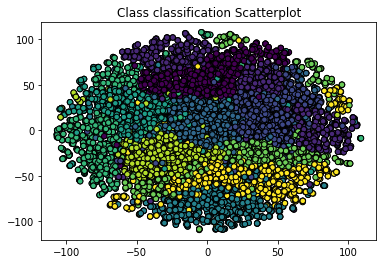

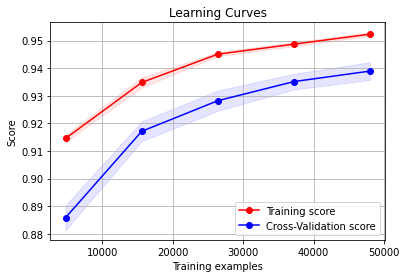

In [28]:
weight= 'uniform'
n_neigh= 9
algo= 'ball_tree'
metric= 'minkowski'
leafs= 60

KNN_eval, acc_eval, report_eval, hyper, y_pred= KNeighbors (X_train, y_train, X_test, y_test, weight, n_neigh, algo, metric, leafs)

weight= 'distance'
n_neigh= 60
algo= 'ball_tree'
metric= 'manhattan'
leafs= 30

KNN_eval_temp, acc_eval_temp, report_eval_temp, hyper_temp, y_pred_temp= KNeighbors (X_train, y_train, X_test, y_test, weight, n_neigh, algo, metric, leafs)

if (acc_eval< acc_eval_temp):
    hyper= hyper_temp
    KNN_eval= KNN_eval_temp
    acc_eval= acc_eval_temp
    report_eval= report_eval_temp
    y_pred= y_pred_temp

KNNPlot (acc_eval, report_eval, KNN_eval, X_train, y_train, X_test, y_pred, hyper)


The setting of the model for a better accuracy is SGDClassifier(alpha=1, eta0=0, fit_intercept=False, max_iter=4000,
              shuffle=False) , where blank value occur the parameter are setted to default
Testing accuracy of Perceptron model is  0.2938
Performance Measure of Perceptron model:

               precision    recall  f1-score   support

           0       0.31      0.92      0.46       980
           1       0.31      0.99      0.48      1135
           2       0.05      0.00      0.01      1032
           3       0.10      0.05      0.06      1010
           4       0.32      0.07      0.12       982
           5       0.19      0.12      0.15       892
           6       1.00      0.00      0.00       958
           7       0.32      0.65      0.43      1028
           8       1.00      0.00      0.00       974
           9       1.00      0.00      0.00      1009

    accuracy                           0.29     10000
   macro avg       0.46      0.28      0.17     10

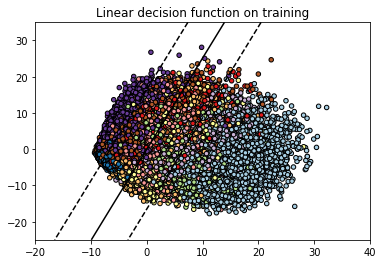

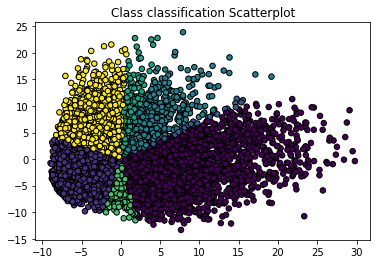

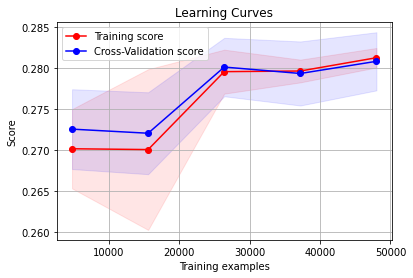

In [30]:
alpha= 1
iteration= 4000
eta0= 0
shuffle= False
intercept= False

SGD_eval, acc_eval, report_eval, hyper, y_pred= PerceptronBackprop (XPCA_train, y_train, XPCA_test, y_test, iteration, alpha, eta0, shuffle, intercept)

alpha= 10
iteration= 4000
eta0= 0
shuffle= False
intercept= False

SGD_eval_temp, acc_eval_temp, report_eval_temp, hyper_temp, y_pred_temp= PerceptronBackprop (XPCA_train, y_train, XPCA_test, y_test, iteration, alpha, eta0, shuffle, intercept)

if (acc_eval< acc_eval_temp):
    hyper= hyper_temp
    SGD_eval= SGD_eval_temp
    acc_eval= acc_eval_temp
    report_eval= report_eval_temp
    y_pred= y_pred_temp

PerceptronPCAplot (acc_eval, report_eval, SGD_eval, XPCA_train, y_train, XPCA_test, y_pred, hyper)


The setting of the model for a better accuracy is SGDClassifier(alpha=10, eta0=0, fit_intercept=False, max_iter=2000,
              shuffle=False) , where blank value occur the parameter are setted to default
Testing accuracy of Perceptron model is  0.8174
Performance Measure of Perceptron model:

               precision    recall  f1-score   support

           0       0.75      0.96      0.84       980
           1       0.73      0.98      0.84      1135
           2       0.91      0.76      0.83      1032
           3       0.76      0.84      0.80      1010
           4       0.87      0.85      0.86       982
           5       0.91      0.57      0.70       892
           6       0.88      0.86      0.87       958
           7       0.83      0.86      0.85      1028
           8       0.86      0.67      0.75       974
           9       0.82      0.77      0.80      1009

    accuracy                           0.82     10000
   macro avg       0.83      0.81      0.81     1

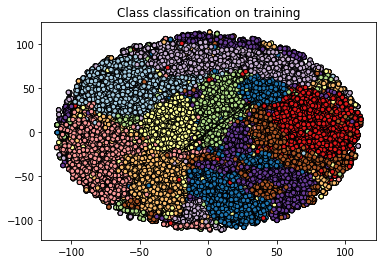

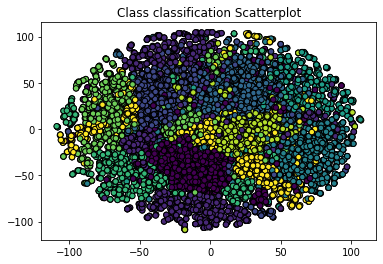

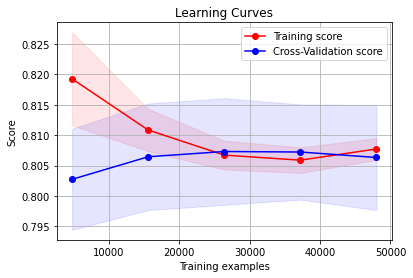

In [29]:
alpha= 1
iteration= 2000
eta0= 0
shuffle= False
intercept= False

SGD_eval, acc_eval, report_eval, hyper, y_pred= PerceptronBackprop (X_train, y_train, X_test, y_test, iteration, alpha, eta0, shuffle, intercept)

alpha= 10
iteration= 2000
eta0= 0
shuffle= False
intercept= False

SGD_eval_temp, acc_eval_temp, report_eval_temp, hyper_temp, y_pred_temp= PerceptronBackprop (X_train, y_train, X_test, y_test, iteration, alpha, eta0, shuffle, intercept)

if (acc_eval< acc_eval_temp):
    hyper= hyper_temp
    SGD_eval= SGD_eval_temp
    acc_eval= acc_eval_temp
    report_eval= report_eval_temp 
    y_pred= y_pred_temp

PerceptronPlot (acc_eval, report_eval, SGD_eval, X_train, y_train, X_test, y_pred, hyper)


The setting of the model for a better accuracy is SGDClassifier(alpha=0.1, eta0=0, fit_intercept=False, loss='squared_error',
              max_iter=4000, shuffle=False) , where blank value occur the parameter are setted to default
Testing accuracy of Perceptron model is  0.2821
Performance Measure of Perceptron model:

               precision    recall  f1-score   support

           0       0.26      0.97      0.41       980
           1       0.30      1.00      0.47      1135
           2       1.00      0.00      0.00      1032
           3       1.00      0.00      0.00      1010
           4       1.00      0.00      0.00       982
           5       1.00      0.00      0.00       892
           6       1.00      0.00      0.00       958
           7       0.28      0.72      0.40      1028
           8       1.00      0.00      0.00       974
           9       1.00      0.00      0.00      1009

    accuracy                           0.28     10000
   macro avg       0.78   

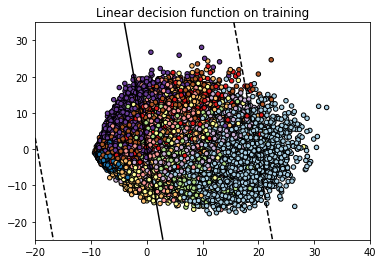

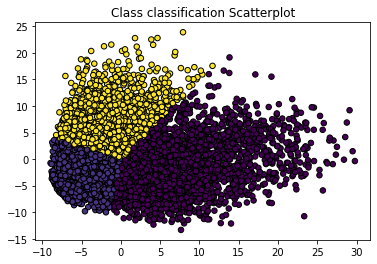

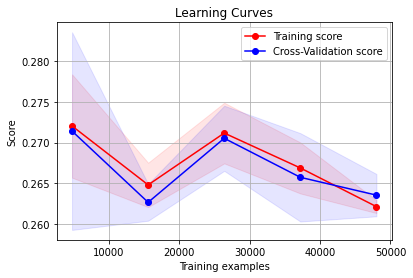

In [27]:
alpha= 0.1
iteration= 4000
eta0= 0
shuffle= False
intercept= False

SGD_eval, acc_eval, report_eval, hyper, y_pred= PerceptronMSE (XPCA_train, y_train, XPCA_test, y_test, iteration, alpha, eta0, shuffle, intercept)

alpha= 0.0001
iteration= 4000
eta0= 0
shuffle= False
intercept= False

SGD_eval_temp, acc_eval_temp, report_eval_temp, hyper_temp, y_pred_temp= PerceptronMSE (XPCA_train, y_train, XPCA_test, y_test, iteration, alpha, eta0, shuffle, intercept)

if (acc_eval< acc_eval_temp):
    hyper= hyper_temp
    SGD_eval= SGD_eval_temp
    acc_eval= acc_eval_temp
    report_eval= report_eval_temp
    y_pred= y_pred_temp

PerceptronPCAplot (acc_eval, report_eval, SGD_eval, XPCA_train, y_train, XPCA_test, y_pred, hyper)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



The setting of the model for a better accuracy is SGDClassifier(alpha=10, eta0=0, fit_intercept=False, loss='squared_error',
              max_iter=2000, shuffle=False) , where blank value occur the parameter are setted to default
Testing accuracy of Perceptron model is  0.8335
Performance Measure of Perceptron model:

               precision    recall  f1-score   support

           0       0.86      0.96      0.91       980
           1       0.73      0.98      0.84      1135
           2       0.91      0.78      0.84      1032
           3       0.76      0.85      0.81      1010
           4       0.86      0.88      0.87       982
           5       0.90      0.60      0.72       892
           6       0.87      0.92      0.89       958
           7       0.81      0.88      0.84      1028
           8       0.89      0.71      0.79       974
           9       0.87      0.74      0.80      1009

    accuracy                           0.83     10000
   macro avg       0.85    

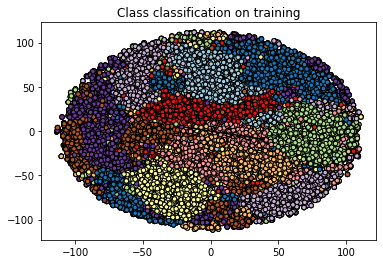

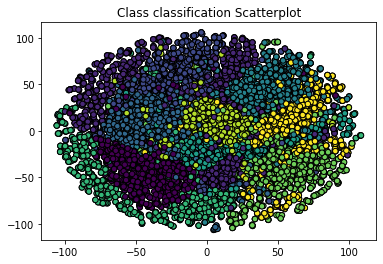

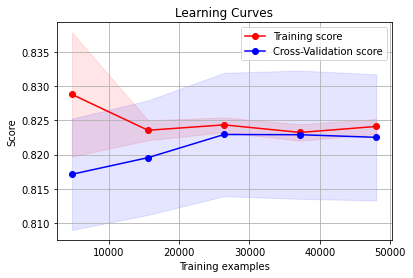

In [31]:
alpha= 10
iteration= 2000
eta0= 0
shuffle= False
intercept= False

SGD_eval, acc_eval, report_eval, hyper, y_pred= PerceptronMSE (X_train, y_train, X_test, y_test, iteration, alpha, eta0, shuffle, intercept)

alpha= 1
iteration= 2000
eta0= 0
shuffle= False
intercept= False

SGD_eval_temp, acc_eval_temp, report_eval_temp, hyper_temp, y_pred_temp= PerceptronMSE (X_train, y_train, X_test, y_test, iteration, alpha, eta0, shuffle, intercept)

if (acc_eval< acc_eval_temp):
    hyper= hyper_temp
    SGD_eval= SGD_eval_temp
    acc_eval= acc_eval_temp
    report_eval= report_eval_temp 
    y_pred= y_pred_temp

PerceptronPlot (acc_eval, report_eval, SGD_eval, X_train, y_train, X_test, y_pred, hyper)